In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!ls 'drive/My Drive'
import csv
import pandas as pd
import xlrd

In [2]:
import openpyxl

loc = "/content/drive/MyDrive/mashad.xlsx"
wb = openpyxl.load_workbook(loc)
sheet = wb.active

SolarEnergy = []
for row in sheet.iter_rows(values_only=True):
    Energy = row[11]
    SolarEnergy.append(Energy)


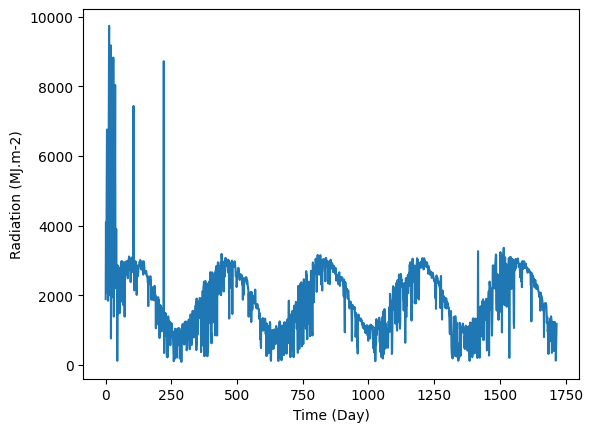

In [4]:
#Draw the shape of the data
import matplotlib.pyplot as plt
plt.plot(SolarEnergy)
plt.xlabel('Time (Day)')
plt.ylabel('Radiation (MJ.m-2)')
plt.show()

In [5]:
from numpy import array
import numpy as np
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)

	return array(X), array(y),y

# define input sequence
raw_seq = SolarEnergy[0:1400]
# choose a number of time steps
n_steps = 10
# split into samples
X, y ,T= split_sequence(raw_seq, n_steps)
raw_seq_test = SolarEnergy[1400:]
# split into samples
X_test, y_test ,T_test= split_sequence(raw_seq_test, n_steps)
#Repeat targets
Target2=[]
for K in range(len(T)):
  TargetK=[T[K],T[K],T[K],T[K],T[K],T[K],T[K],T[K],T[K],T[K]]
  Target2.append(TargetK)
ATargt2=array(Target2)

In [6]:
#Create model MTM LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import TimeDistributed
from keras.layers import SimpleRNN
from keras.layers import RepeatVector

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
networkHis=model.fit(X, ATargt2, epochs=200, verbose=0,validation_split=0.1)

In [ ]:
history =  networkHis.history
import matplotlib.pyplot as plt
lossess = history['loss']
val_lossess = history['val_loss']

In [ ]:
#Draw an error diagram
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(lossess)
plt.plot(val_lossess)
plt.legend(['Loss','val_Loss'])

In [ ]:
#Summary of created model specifications
model.summary()

In [ ]:
#Model prediction for training data
petrain=model.predict(X)

In [ ]:
#Model prediction for test data
petest=model.predict(X_test)

In [ ]:
#Create model MTM LSTM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_vector_length =10
X_train = petrain.reshape(petrain.shape[0], feature_vector_length)
X_test = petest.reshape(petest.shape[0], feature_vector_length)
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test )
y = y.reshape(y.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
y_train = scaler.fit_transform(y)
y_test = scaler.transform(y_test)
input_shape = (feature_vector_length,)
model2 = Sequential()
model2.add(Dense(20, input_shape=input_shape, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(30, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(30, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1))

In [ ]:
from tensorflow import keras
import tensorflow as tf
opt =tf.keras.optimizers.RMSprop()
model2.compile(loss="mean_squared_error", optimizer=opt)

In [ ]:
net_history = model2.fit(x_train, y_train, epochs=200,validation_split=0.1)

In [ ]:
#Summary of created model specifications
model2.summary()

In [ ]:
#Model evaluation
from sklearn.metrics import mean_absolute_error
ptredict=model2.predict(x_test)
se_test = model2.evaluate(x_test, y_test)
mean_absolute_error(y_test,ptredict)

In [ ]:
#Draw an error diagram
nethistory = net_history.history
import matplotlib.pyplot as plt
lossess2 = nethistory['loss']
val_lossess2 = nethistory['val_loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(lossess2)
plt.plot(val_lossess2)
plt.legend(['Loss','val_Loss'])